## Gradient Descent

### Implementing Gradient Descent to Solve f(x) = (x + 3)^2
**f(x) = (x+3)^2** <br/>
**grad(f) = 2x+6** At the minimum, the gradient will be zero.

In [5]:
# f(x) = (x+3)^2
x0 = 0
learning_rate = 0.01
precision = 0.00001
max_iter = 1000
# dy/dx = grad(x) = 2x+6
# Gradient (derivative) function  
grad = lambda x : 2 * x + 6
for i in range(max_iter):
    x1 = x0 - learning_rate * grad(x0)
    dx = abs(x1 - x0)
    if dx > precision:
        x0 = x1
    else:
        break
print(f'Reach x = {x1:.3f} with last dx = {dx:.5f} after {i} iterates')

Reach x = -3.000 with last dx = 0.00001 after 431 iterates


### Fitting a Linear Model to a Generated Wave Dataset Using Gradient Descent

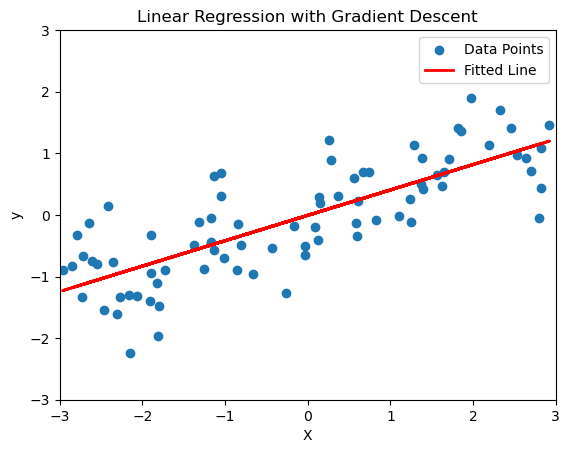

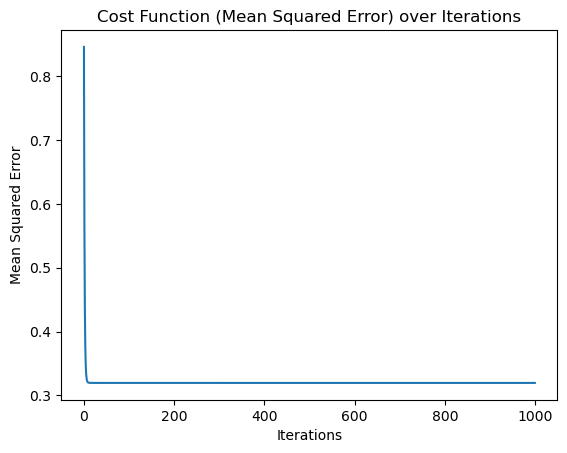

In [6]:
import numpy as np  
import matplotlib.pyplot as plt  
import mglearn  
from sklearn.model_selection import train_test_split  

# Generate synthetic wave dataset  
X, y = mglearn.datasets.make_wave(n_samples=100)  

# Split dataset into training and test sets  
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)  

# Reshape the input data  
x_train = x_train.reshape(-1, 1)  
y_train = y_train.reshape(-1, 1)  

# Add bias (intercept) term  
intercept = np.ones_like(x_train).reshape(-1, 1)  
X_bias = np.c_[intercept, x_train]  # Add bias as the first column  

# Prepare parameters for gradient descent  
learning_rate = 0.1  
max_iter = 1000   # Increase iterations for better convergence  
n_samples, n_features = X_bias.shape
theta = np.zeros((n_features, 1))  # Initialize weights (slope + intercept)  
cost_function = []  

# Gradient Descent Algorithm  
for i in range(max_iter):  
    y_hat = np.dot(X_bias, theta)           # Predicted values  
    error = y_hat - y_train                  # Calculate error  
    gradient = np.dot(X_bias.T, error) / n_samples  # Calculate gradients  
    theta -= learning_rate * gradient         # Update the parameters  

    # Calculate and store cost function for analysis  
    cost = (error ** 2).mean()               # Mean Squared Error  
    cost_function.append(cost)  

# Function to plot decision boundary  
def plot_decision_boundary(x, y, y_pred=None):  
    plt.scatter(x, y, label='Data Points')  
    if y_pred is not None:  
        plt.plot(x, y_pred, color='red', label='Fitted Line', linewidth=2)  
    plt.xlim([-3, 3])  
    plt.ylim([-3, 3])  
    plt.xlabel('X')  
    plt.ylabel('y')  
    plt.title('Linear Regression with Gradient Descent')  
    plt.legend()  
    plt.show()  

# Generate predictions using the fitted parameters  
y_pred = np.dot(X_bias, theta)  

# Plot the training data and the fitted line  
plot_decision_boundary(x_train, y_train, y_pred)  

# Plot the cost function over iterations  
plt.plot(cost_function)  
plt.title('Cost Function (Mean Squared Error) over Iterations')  
plt.xlabel('Iterations')  
plt.ylabel('Mean Squared Error')  
plt.show()